In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.8 MB/s eta 0:00:00
   ━━

In [ ]:
import pandas as pd

# Load datasets
app_data = pd.read_csv('application_record.csv')
credit_data = pd.read_csv('credit_record.csv')

# Display basic information
print(app_data.head())
print(credit_data.head())


        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

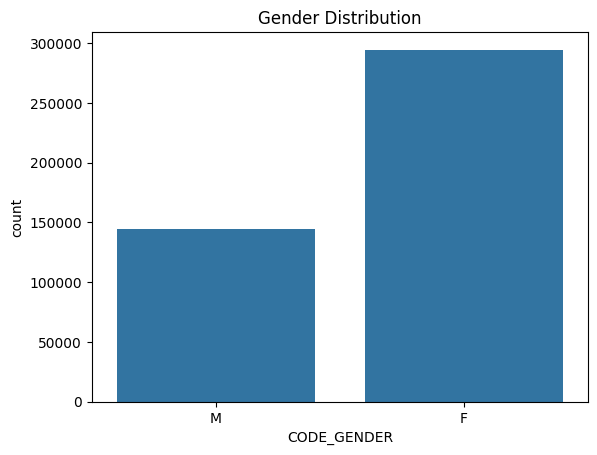

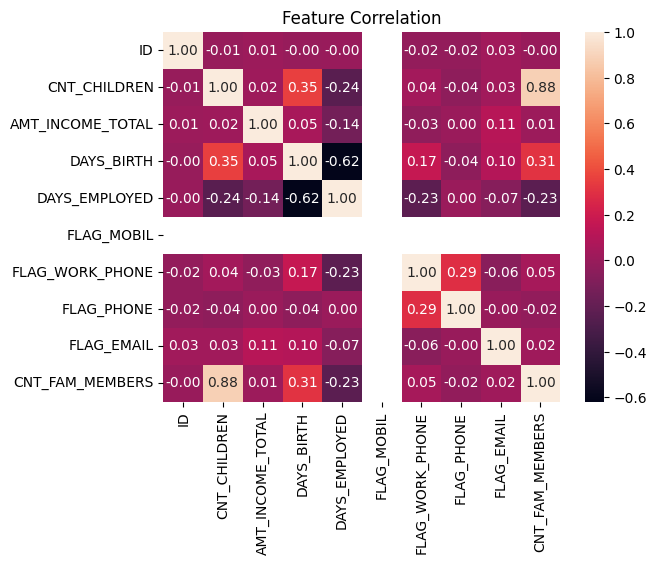

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Gender
sns.countplot(x='CODE_GENDER', data=app_data)
plt.title('Gender Distribution')
plt.show()

# Example: Correlation Heatmap
# Calculate correlation only for numeric columns
sns.heatmap(app_data.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
encoder = LabelEncoder()
app_data['CODE_GENDER'] = encoder.fit_transform(app_data['CODE_GENDER'])

# Scaling numerical features
scaler = StandardScaler()
app_data[['AMT_INCOME_TOTAL']] = scaler.fit_transform(app_data[['AMT_INCOME_TOTAL']])


In [ ]:
# Merging datasets
merged_data = pd.merge(app_data, credit_data, on='ID')
print(merged_data.head())


        ID  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804            1            Y               Y             0   
1  5008804            1            Y               Y             0   
2  5008804            1            Y               Y             0   
3  5008804            1            Y               Y             0   
4  5008804            1            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          2.179879          Working    Higher education     Civil marriage   
1          2.179879          Working    Higher education     Civil marriage   
2          2.179879          Working    Higher education     Civil marriage   
3          2.179879          Working    Higher education     Civil marriage   
4          2.179879          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      

In [ ]:
# Define target based on STATUS
def map_status_to_target(status):
    if status in ['C', '0']:
        return 1  # Good credit behavior
    else:
        return 0  # Bad credit behavior

# Apply mapping
merged_data['TARGET'] = merged_data['STATUS'].apply(map_status_to_target)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (drop non-relevant columns like ID, STATUS, etc.)
X = merged_data.drop(['TARGET', 'ID', 'STATUS'], axis=1)
y = merged_data['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 622172, Testing samples: 155543


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Reshape to a 1D array before assigning to the column
X_train['OCCUPATION_TYPE'] = cat_imputer.fit_transform(X_train[['OCCUPATION_TYPE']]).ravel()
X_test['OCCUPATION_TYPE'] = cat_imputer.transform(X_test[['OCCUPATION_TYPE']]).ravel()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

scaler = StandardScaler()

# Scale numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
print(X_train.shape)
print(X_train.head())

print(X_test.shape)
print(X_test.head())


(622172, 18)
        CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
566880            0            Y               N     -0.575625   
147360            0            Y               Y     -0.575625   
481354            1            N               Y     -0.575625   
392502            1            Y               N     -0.575625   
671336            0            N               Y      2.112329   

        AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
566880         -0.305551                 4                    4   
147360         -0.393962                 0                    4   
481354         -0.305551                 0                    0   
392502          0.357525                 0                    4   
671336          0.136499                 2                    4   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
566880                   1                  1    0.414837      -0.442263   
147360                   1         

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
binary_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']  # Binary categorical columns

# Apply Label Encoding
for col in binary_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Check for multi-category columns (if any)
multi_category_cols = ['OCCUPATION_TYPE']  # Replace with any other multi-category columns

# Apply One-Hot Encoding for multi-category columns
X_train = pd.get_dummies(X_train, columns=multi_category_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=multi_category_cols, drop_first=True)

# Ensure test set has the same columns as train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Display final results
print("\nModel Performance Summary:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Training Logistic Regression...


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
print("Class distribution in the entire dataset:")
print(y.value_counts())


Class distribution in the entire dataset:
TARGET
0    777715
Name: count, dtype: int64


automate models using pycart

In [ ]:
from pycaret.classification import *

# Combine features and target into one dataframe
data = merged_data.copy()  # Replace with your merged dataframe
data['TARGET'] = y  # Replace 'TARGET' with your actual target column

# Initialize PyCaret
clf = setup(data=data, target='TARGET', silent=True, session_id=42)

# Compare models
best_model = compare_models()


In [ ]:
tuned_model = tune_model(best_model)


In [ ]:
final_model = finalize_model(tuned_model)


more control

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC(probability=True)
}


In [ ]:
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": accuracy, "AUC": auc}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, AUC = {metrics['AUC']:.4f}" if metrics['AUC'] else "")


In [ ]:
sorted_results = sorted(results.items(), key=lambda x: x[1]['AUC'], reverse=True)
print("Ranked Models by AUC:")
for rank, (model_name, metrics) in enumerate(sorted_results, start=1):
    print(f"{rank}. {model_name} - AUC: {metrics['AUC']:.4f}, Accuracy: {metrics['Accuracy']:.4f}")
